In [1]:
# importing the requried libraries
from collections import OrderedDict    # For recording the model specification 

import pandas as pd                    # For file input/output
import numpy as np                     # For vectorized math operations

import pylogit as pl                   # For MNL model estimation and
                                       # conversion from wide to long format

# reading the data file 
Data = pd.read_csv("LongDataSurvey.csv",sep=",")

In [2]:
Data.columns #Already formatted as Long in Excel

Index(['Personal_ID', 'Income', 'use_frequency', 'AV_usecase', 'TRS_usecase',
       'ChoiceSituationID', 'Alt_ID', 'choice', 'Wait Time', 'Cost',
       'Travel Time', 'Carpool', 'Age', 'Gender', 'Politics', 'Social',
       'TOD_8to5', 'TOD_5to10', 'TOD_10to3'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
Data['TotalTime'] = Data['Wait Time'] + Data['Travel Time']

In [5]:
Data = Data[['Personal_ID', 'Income', 'use_frequency', 'AV_usecase', 'TRS_usecase',
       'ChoiceSituationID', 'Alt_ID', 'choice','TOD_8to5','TOD_5to10','TOD_10to3','Cost', 'Wait Time',
       'Travel Time','TotalTime', 'Carpool', 'Age', 'Gender', 'Politics', 'Social',]]


In [6]:
##########
# Create scaled variables so the estimated coefficients are of similar magnitudes

# Create a numeric income variable based on the mean of an income category, the categories are not uniform so we treat them separatly
Data['income_num'] = np.where(Data['Income'] <= 2, (25000 + (Data['Income'] - 1) * 40000), 0)
Data['income_num'] = np.where(Data['Income'] == 3, (100000 + (Data['Income'] - 3) * 50000), Data['income_num'])
Data['income_num'] = np.where(Data['Income'].isin([4,5]), (160000 + (Data['Income'] - 4) * 80000), Data['income_num'])


In [7]:
Data['income_5000$'] = Data['income_num'] / 5000

In [8]:
Data['fare/income'] = Data['Cost']/Data['income_5000$']
Data

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,20,3,20,23,0,1,4,2,1,240000,48.0,0.416667
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,35,10,30,40,0,1,4,2,1,240000,48.0,0.729167
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833
924,103,5,6,4,"1,2",309,1,1,0,0,1,10,3,20,23,0,1,2,1,2,240000,48.0,0.208333
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500


In [9]:
#Data = Data.drop(['income_10000$'],axis=1)
#Data = Data.drop(['fare/income'],axis=1)

In [10]:
Data.head(50)

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,20,3,20,23,0,1,4,2,1,240000,48.0,0.416667
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,35,10,30,40,0,1,4,2,1,240000,48.0,0.729167
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167
5,1,5,5,"1,3","1,2,3,4,5",2,3,0,0,1,0,25,10,20,30,1,1,4,2,1,240000,48.0,0.520833
6,1,5,5,"1,3","1,2,3,4,5",3,1,0,0,0,1,10,10,15,25,1,1,4,2,1,240000,48.0,0.208333
7,1,5,5,"1,3","1,2,3,4,5",3,2,1,0,0,1,25,3,45,48,1,1,4,2,1,240000,48.0,0.520833
8,1,5,5,"1,3","1,2,3,4,5",3,3,0,0,0,1,25,5,30,35,1,1,4,2,1,240000,48.0,0.520833
9,2,4,3,"1,3,5","1,2,3,4,5",4,1,0,1,0,0,20,5,30,35,0,3,4,5,3,160000,32.0,0.625000


In [11]:
#data[cost_leisure] 1.isinAVusecase

#Data['performance_business'] = np.where(data_long['purpose'] == 1, data_long['performance'], 0)
#Data['performance_conference'] = np.where(data_long['purpose'] == 2, data_long['performance'], 0)
#Data['performance_vacation'] = np.where(data_long['purpose'] == 3, data_long['performance'], 0)
#Data['performance_visit'] = np.where(data_long['purpose'] == 4, data_long['performance'], 0)
#data_long['performance_school'] = np.where(data_long['purpose'] == 5, data_long['performance'], 0)
#data_long['performance_other'] = np.where(data_long['purpose'] == 6, data_long['performance'], 0)


In [12]:
obs_id_column = "ChoiceSituationID"
choice_column = "choice"
custom_alt_id = 'Alt_ID'
new_alt_id = 'Alt_ID'

In [39]:
basic_specification = OrderedDict()
basic_names = OrderedDict()

basic_specification["intercept"] = [[1,2]]
basic_names["intercept"] = ['AV Taxi with and without Pilot']#, 'w Pilot']

# Note that the names used below are simply for consistency with
# the coefficient names given in the Python Biogeme example.
# example_specification["travel_cost_hundredth"] = [[1, 2, 3]]
# example_names["travel_cost_hundredth"] = ['B_COST']

basic_specification["TotalTime"] = [[1, 2, 3]]
basic_names["TotalTime"] = ['Total Time, units: min']#,'Total Time Taxi, units: min']

basic_specification["Wait Time"] = [[1, 2, 3]]
basic_names["Wait Time"] = ['Wait Time, units: min']#,'Wait Time Taxi, units: min']

basic_specification["Cost"] = [[1, 2, 3]]
basic_names["Cost"] = ['Cost , units:$']#,'Cost Taxi, units:$']

basic_specification["Carpool"] = [1, 2, 3]
basic_names["Carpool"] = ['Carpool (AV Taxi)',
                          'Carpool (AV Taxi + Pilot)',
                          'Carpool (Traditional Taxi)']

basic_specification["fare/income"] = [[1,2]]#,3]
basic_names["fare/income"] = ['fare/income AV Taxi with and without Pilot']#, 'Social TRS']#pilot', 'Social TRS']

basic_specification["Social"] = [1,2,3]
basic_names["Social"] = ['Social Level AV Solo', 'Social Level AV with pilot', 'Social Level TRS']

basic_specification["TOD_10to3"] = [[1,2]]#3]
basic_names["TOD_10to3"] = ['Time of Day Use Late Night (10PM-3AM) AV Dummy']#', 'TOD pilot', 'TOD TRS']




#Make Dummies for identifiers 

#basic_specification["Cost"] = [1,2,3]
#basic_names["Cost"] = ["Cost, units:$, (RoboTaxi)",
 #                             "Cost, units:$, (RoboTaxi + Pilot)",
  #                           'Cost, units:$, (Traditional Taxi)']

#basic_specification['Gender'] = [[1,2],[3]]
#basic_names['Gender'] = ['Gender AV', 'Gender Taxi']

##basic_specification["Politics"] = [[1, 2, 3]]
#basic_names["Politics"] = ['Politics']

#basic_specification["Social"] = [[1, 2, 3, 4, 5]]
#basic_names["Social"] = ['Social']

#basic_specification["Carpool"] = [[0,1]]
#basic_names["Carpool"] = ['Carpool']

                          

In [40]:
custom_alt_id = 'Alt_ID'
obs_id_column = "ChoiceSituationID"
choice_column = 'choice'


In [41]:
Taxi_mnl = pl.create_choice_model(data=Data,
                                        alt_id_col=custom_alt_id,
                                        obs_id_col=obs_id_column,
                                        choice_col=choice_column,
                                        specification=basic_specification,
                                        model_type="MNL",
                                        names=basic_names)

# Specify the initial values and method for the optimization.
Taxi_mnl.fit_mle(np.zeros(12))


Log-likelihood at zero: -339.4712
Initial Log-likelihood: -339.4712
Estimation Time for Point Estimation: 0.09 seconds.
Final log-likelihood: -280.7645


C:\anaconda\lib\site-packages\scipy\optimize\_minimize.py:524: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
C:\anaconda\lib\site-packages\pylogit\base_multinomial_cm_v2.py:1259: RuntimeWarning: invalid value encountered in sqrt
  self._store_inferential_results(np.sqrt(np.diag(self.robust_cov)),


                     Multinomial Logit Model Regression Results                    
Dep. Variable:                      choice   No. Observations:                  309
Model:             Multinomial Logit Model   Df Residuals:                      297
Method:                                MLE   Df Model:                           12
Date:                     Mon, 25 Apr 2022   Pseudo R-squ.:                   0.173
Time:                             19:49:01   Pseudo R-bar-squ.:               0.138
AIC:                               585.529   Log-Likelihood:               -280.765
BIC:                               630.329   LL-Null:                      -339.471
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
AV Taxi with and without Pilot                    -0.1096      0.437     -0.251      0.802      -0

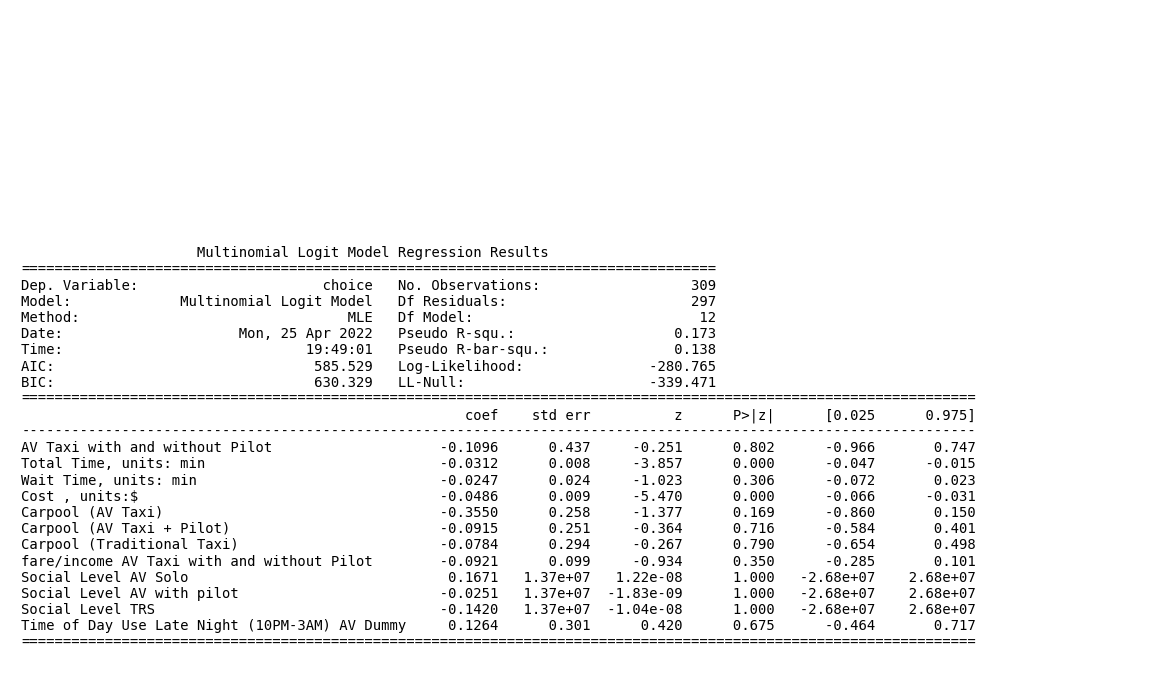

In [44]:
A = Taxi_mnl.get_statsmodels_summary()
print(A)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(A), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('MNML.png')

In [17]:
#people are more willing to carpool in a TRS than in a robotaxi

In [18]:
AVSolo_Only = Data.loc[Data['Alt_ID'].isin(range(2))]
AVSolo_Only

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,20,3,20,23,0,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,35,10,30,40,0,1,4,2,1,240000,48.0,0.729167,1.0
6,1,5,5,"1,3","1,2,3,4,5",3,1,0,0,0,1,10,10,15,25,1,1,4,2,1,240000,48.0,0.208333,1.0
9,2,4,3,"1,3,5","1,2,3,4,5",4,1,0,1,0,0,20,5,30,35,0,3,4,5,3,160000,32.0,0.625000,1.0
12,2,4,3,"1,3,5","1,2,3,4,5",5,1,0,0,1,0,10,5,15,20,1,3,4,5,3,160000,32.0,0.312500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,102,4,6,4,4,305,1,1,0,1,0,45,3,35,38,1,2,2,5,1,160000,32.0,1.406250,1.0
915,102,4,6,4,4,306,1,1,0,0,1,20,3,10,13,1,2,2,5,1,160000,32.0,0.625000,1.0
918,103,5,6,4,"1,2",307,1,1,1,0,0,35,3,45,48,0,1,2,1,2,240000,48.0,0.729167,1.0
921,103,5,6,4,"1,2",308,1,1,0,1,0,25,10,35,45,0,1,2,1,2,240000,48.0,0.520833,1.0


In [19]:
TRS_Only = Data.loc[-Data['Alt_ID'].isin(range(2))]
TRS_Only

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
5,1,5,5,"1,3","1,2,3,4,5",2,3,0,0,1,0,25,10,20,30,1,1,4,2,1,240000,48.0,0.520833,1.0
7,1,5,5,"1,3","1,2,3,4,5",3,2,1,0,0,1,25,3,45,48,1,1,4,2,1,240000,48.0,0.520833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,103,5,6,4,"1,2",307,3,0,1,0,0,25,3,20,23,1,1,2,1,2,240000,48.0,0.520833,1.0
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


In [20]:
z = 0
Tollsub_list = []
while z < 6:
    Tollsub_list.append(AVSolo_Only['Cost']-z) #subtracting only to the AV costs assuming there is a government subsidy, there is no subsidy for other modes
    z+=1
Tollsub_list[1]
#make list of lists for added toll increments

0      19
3      34
6       9
9      19
12      9
       ..
912    44
915    19
918    34
921    24
924     9
Name: Cost, Length: 309, dtype: int64

In [21]:
i = 0
Toll_incrs = []
while i < 6:
    new = AVSolo_Only.copy()
    new['Cost'] = Tollsub_list[i]
    Toll_incrs.append(new)
    i+=1
Toll_incrs[1] 
#Make AV only dataframes for toll increments

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,19,3,20,23,0,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,34,10,30,40,0,1,4,2,1,240000,48.0,0.729167,1.0
6,1,5,5,"1,3","1,2,3,4,5",3,1,0,0,0,1,9,10,15,25,1,1,4,2,1,240000,48.0,0.208333,1.0
9,2,4,3,"1,3,5","1,2,3,4,5",4,1,0,1,0,0,19,5,30,35,0,3,4,5,3,160000,32.0,0.625000,1.0
12,2,4,3,"1,3,5","1,2,3,4,5",5,1,0,0,1,0,9,5,15,20,1,3,4,5,3,160000,32.0,0.312500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,102,4,6,4,4,305,1,1,0,1,0,44,3,35,38,1,2,2,5,1,160000,32.0,1.406250,1.0
915,102,4,6,4,4,306,1,1,0,0,1,19,3,10,13,1,2,2,5,1,160000,32.0,0.625000,1.0
918,103,5,6,4,"1,2",307,1,1,1,0,0,34,3,45,48,0,1,2,1,2,240000,48.0,0.729167,1.0
921,103,5,6,4,"1,2",308,1,1,0,1,0,24,10,35,45,0,1,2,1,2,240000,48.0,0.520833,1.0


In [22]:
combineFrames = [] #combine drivingmode toll increments list of frames with the other_modes frame
for copy in Toll_incrs:
    df = pd.concat([copy,TRS_Only])
    combineFrames.append(df)
combineFrames[2].sort_index()

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,18,3,20,23,0,1,4,2,1,240000,48.0,0.416667,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,33,10,30,40,0,1,4,2,1,240000,48.0,0.729167,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,8,3,20,23,0,1,2,1,2,240000,48.0,0.208333,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


In [23]:
Sorted = [] #sort by index
for copy in combineFrames:
    Sorted.append(copy.sort_index())

In [24]:
for copy in Sorted:    #rerun the fare/income column
    copy['fare/income'] = copy['Cost'] / copy['income_5000$']
    

In [25]:
for copy in Sorted: #Final list of dataframes for the incremental toll costs 0-10$
    display(copy)

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,20,3,20,23,0,1,4,2,1,240000,48.0,0.416667,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,35,10,30,40,0,1,4,2,1,240000,48.0,0.729167,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,10,3,20,23,0,1,2,1,2,240000,48.0,0.208333,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,19,3,20,23,0,1,4,2,1,240000,48.0,0.395833,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,34,10,30,40,0,1,4,2,1,240000,48.0,0.708333,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,9,3,20,23,0,1,2,1,2,240000,48.0,0.187500,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,18,3,20,23,0,1,4,2,1,240000,48.0,0.375000,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,33,10,30,40,0,1,4,2,1,240000,48.0,0.687500,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,8,3,20,23,0,1,2,1,2,240000,48.0,0.166667,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,17,3,20,23,0,1,4,2,1,240000,48.0,0.354167,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,32,10,30,40,0,1,4,2,1,240000,48.0,0.666667,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,7,3,20,23,0,1,2,1,2,240000,48.0,0.145833,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,16,3,20,23,0,1,4,2,1,240000,48.0,0.333333,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,31,10,30,40,0,1,4,2,1,240000,48.0,0.645833,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,6,3,20,23,0,1,2,1,2,240000,48.0,0.125000,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,15,3,20,23,0,1,4,2,1,240000,48.0,0.312500,1.0
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,30,10,30,40,0,1,4,2,1,240000,48.0,0.625000,1.0
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0
924,103,5,6,4,"1,2",309,1,1,0,0,1,5,3,20,23,0,1,2,1,2,240000,48.0,0.104167,1.0
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0


In [26]:
Preds = [] #prediction probabilities for each toll increment
for frame in Sorted:
    prediction_array = Taxi_mnl.predict(frame) 
    Preds.append(prediction_array)
Preds

[array([0.45685664, 0.36519371, 0.17794965, 0.30576071, 0.14416221,
        0.55007708, 0.59533226, 0.17381137, 0.23085637, 0.69073065,
        0.11231306, 0.19695629, 0.85065311, 0.07769362, 0.07165327,
        0.77592687, 0.15611289, 0.06796025, 0.1328645 , 0.7509253 ,
        0.1162102 , 0.69163233, 0.16889726, 0.13947041, 0.4378212 ,
        0.37301209, 0.18916671, 0.10394157, 0.13791832, 0.75814012,
        0.56415824, 0.30552921, 0.13031256, 0.10387246, 0.54646768,
        0.34965986, 0.60305366, 0.27715543, 0.11979091, 0.50021094,
        0.29318259, 0.20660646, 0.6043052 , 0.10631066, 0.28938414,
        0.42339781, 0.1149457 , 0.46165649, 0.3544609 , 0.36267823,
        0.28286087, 0.82801741, 0.06190787, 0.11007472, 0.2228297 ,
        0.35831024, 0.41886005, 0.28554774, 0.24820419, 0.46624807,
        0.47175631, 0.27817335, 0.25007034, 0.19348558, 0.12763981,
        0.6788746 , 0.36007376, 0.11515577, 0.52477047, 0.199799  ,
        0.16805283, 0.63214817, 0.0823872 , 0.17

In [27]:
i = 0 
while i < 6:
    Sorted[i]['Probability'] = Preds[i]
    i+=1
Sorted[0]

,Personal_ID,Income,use_frequency,AV_usecase,TRS_usecase,ChoiceSituationID,Alt_ID,choice,TOD_8to5,TOD_5to10,TOD_10to3,Cost,Wait Time,Travel Time,TotalTime,Carpool,Age,Gender,Politics,Social,income_num,income_5000$,fare/income,intercept,Probability
0,1,5,5,"1,3","1,2,3,4,5",1,1,0,1,0,0,20,3,20,23,0,1,4,2,1,240000,48.0,0.416667,1.0,0.456857
1,1,5,5,"1,3","1,2,3,4,5",1,2,0,1,0,0,25,3,10,13,1,1,4,2,1,240000,48.0,0.520833,1.0,0.365194
2,1,5,5,"1,3","1,2,3,4,5",1,3,1,1,0,0,20,10,30,40,1,1,4,2,1,240000,48.0,0.416667,1.0,0.177950
3,1,5,5,"1,3","1,2,3,4,5",2,1,0,0,1,0,35,10,30,40,0,1,4,2,1,240000,48.0,0.729167,1.0,0.305761
4,1,5,5,"1,3","1,2,3,4,5",2,2,1,0,1,0,35,10,45,55,1,1,4,2,1,240000,48.0,0.729167,1.0,0.144162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,103,5,6,4,"1,2",308,2,0,0,1,0,20,3,20,23,1,1,2,1,2,240000,48.0,0.416667,1.0,0.503528
923,103,5,6,4,"1,2",308,3,0,0,1,0,25,3,35,38,1,1,2,1,2,240000,48.0,0.520833,1.0,0.229957
924,103,5,6,4,"1,2",309,1,1,0,0,1,10,3,20,23,0,1,2,1,2,240000,48.0,0.208333,1.0,0.698438
925,103,5,6,4,"1,2",309,2,0,0,0,1,45,3,35,38,1,1,2,1,2,240000,48.0,0.937500,1.0,0.046415


In [28]:
Sorted[0].groupby('Alt_ID').agg({'Probability': 'sum'}) #groupby check

,Probability
Alt_ID,
1,110.89563
2,93.10437
3,105.00000


In [29]:
Shares1 = []
for copy in Sorted:
    A = copy.groupby('Alt_ID').agg({'Probability': 'sum'})
    A['Share']  = A['Probability']/309 #responses (3 per person)
    Shares1.append(A)
Shares1[0] # Example market share for toll = $4

,Probability,Share
Alt_ID,,
1,110.89563,0.358886
2,93.10437,0.301309
3,105.00000,0.339806


In [35]:
Marketarr = [] #matrix of market shares based on toll cost increases and mode_id
for shares in Shares1:
    Marketarr.append(shares['Share'])
df = pd.DataFrame(Marketarr)
ShareFrame = df.reset_index()
ShareFrame = ShareFrame.rename(columns={1:'AV Taxi',2:'AV Taxi w/ Pilot',3:'Traditional Rideshare Service'})
ShareFrame = ShareFrame.drop(columns=['index'])
ShareFrame.index.name = 'AV Solo Cost Decreases $'
ShareFrame

Alt_ID,AV Taxi,AV Taxi w/ Pilot,Traditional Rideshare Service
AV Solo Cost Decreases $,,,
0,0.358886,0.301309,0.339806
1,0.368866,0.296433,0.334701
2,0.378949,0.291510,0.329542
3,0.389125,0.286543,0.324332
4,0.399390,0.281535,0.319075
5,0.409734,0.276491,0.313774


In [31]:
import matplotlib.pyplot as plt
plt.rcdefaults()

from labellines import labelLine, labelLines

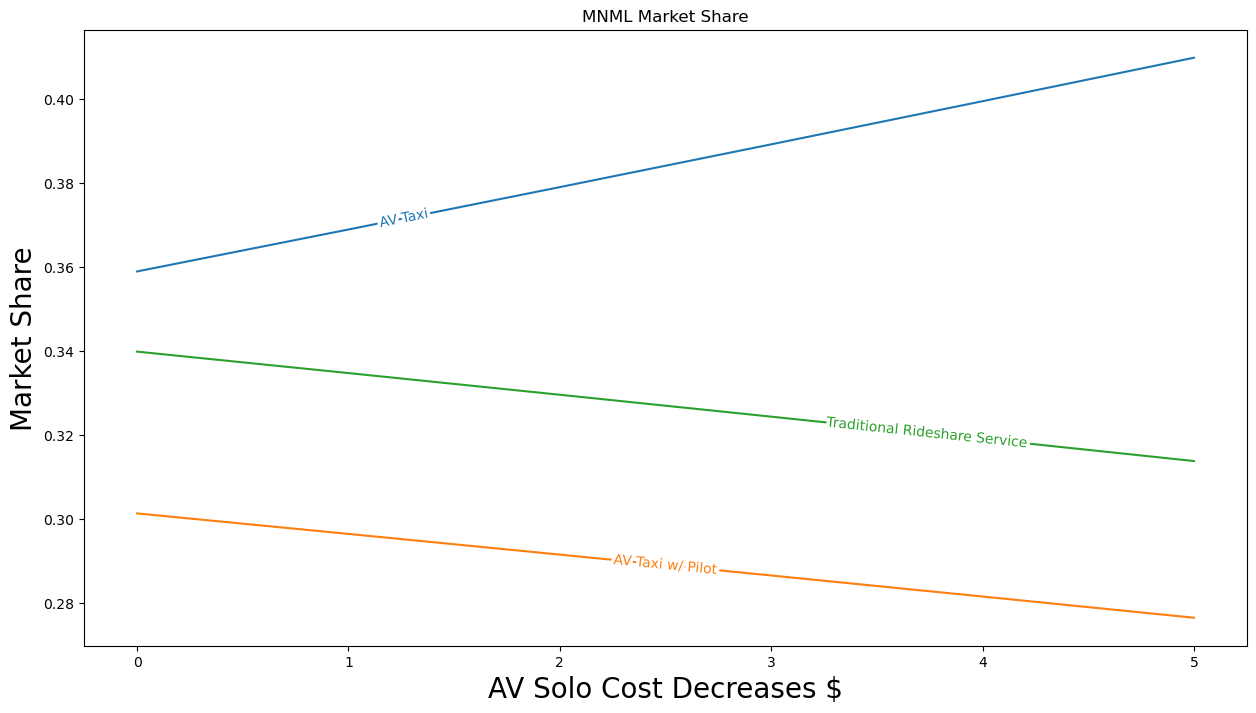

In [34]:
ax = ShareFrame.plot(figsize = (15,8))
ax.set_ylabel('Market Share', fontsize = 20)
ax.set_xlabel('AV Solo Cost Decreases $', fontsize = 20)
ax.set_title('MNML Market Share')
labelLines(plt.gca().get_lines(), zorder=2.5)
ax.get_legend().remove()
plt.show()